In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Task 1 : Character detector to extract printed or handwritten text from an image or video**

In [ ]:
# Install Tesseract-OCR and its Python wrapper
!apt-get install tesseract-ocr
!pip install pytesseract opencv-python


**Load the image**

array([[[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]]], dtype=uint8)
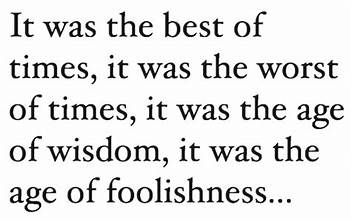

In [ ]:
#2 Load the image
import cv2
# Load an image
image = cv2.imread('/content/image.jpg')
image

**Preprocess the image**

In [ ]:
# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

**Detect and Recognize**

In [ ]:
import pytesseract
# Point Tesseract to the installed location of the tesseract executable
# pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

# Extract text from image
text = pytesseract.image_to_string(gray_image)

print(text)

It was the best of
times, it was the worst
of times, it was the age
of wisdom, it was the
age of foolishness...



**Extracting text from the video**

In [ ]:
# Install OpenCV and PyTesseract
!pip install opencv-python pytesseract


**Uploading the image**

In [ ]:
#file uploading :
from google.colab import files
uploaded = files.upload()


Saving extract txt.mp4 to extract txt (1).mp4


**Acessing the Uploaded Video File**

In [ ]:
video = '/content/vid.mp4'
# Now, you can use `video_path` in your video processing code


In [ ]:
#checking the uploaded file
!ls


image.jpg  sample_data	vid.mp4


**Capture Video Frames**

In [ ]:
import cv2

def extract_frames(video_path, skip_frames=30):

    video = cv2.VideoCapture(video_path)
    frames = []
    frame_id = 0

    while True:
        success, frame = video.read()
        if not success:
            break
        if frame_id % skip_frames == 0:
            frames.append(frame)
        frame_id += 1

    video.release()
    return frames


**Preprocess the frames output**

In [ ]:
def preprocess_frame(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    return gray


**Apply OCR to Extract Text**

In [ ]:
import pytesseract

def extract_text_from_frames(frames):

    extracted_texts = []
    for frame in frames:
        # Convert to grayscale for OCR processing
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        text = pytesseract.image_to_string(gray_frame)
        extracted_texts.append(text)
    return extracted_texts


**Printing the output of all frames (note that it will need further preprocessing to organize it)**

In [ ]:
# Specify the path to your video file
video_path = '/content/vid.mp4'

# Extract frames from the video
frames = extract_frames(video_path, skip_frames=30)

# Extract text from the frames
extracted_texts = extract_text_from_frames(frames)

# Now you can print or process the extracted_texts as needed
for i, text in enumerate(extracted_texts):
    print(f"Text from Frame {i+1}: {text}")


Text from Frame 1: In my younger and more vulnerable years my
father gave me some advice that I’ve been turning
over in my mind ever since.

“Whenever you feel like criticizing any one,” he
told me, “just remember that all the people in this
world haven’t had the advantages that you’ve
had.”

He didn’t say any more, but we've always been
unusually communicative in a reserved way, and I
understood that he meant a great deal more than
that. In consequence, I’m inclined to reserve all
judgments, a habit that has opened up many
curious natures to me and also made me the victim
of not a few veteran bores. The abnormal mind is
quick to detect and attach itself to this quality
when it appears in a normal person, and so it came
about that in college I was unjustly accused of
being a politician, because I was privy to the secret
griefs of wild, unknown men. Most of the
confidences were unsought — frequently T have
feigned sleep, preoccupation, or a hostile levity
when I realized by some unmista

**Preprocessing the output (removing the duplicated of the frames)**

In [ ]:
#Here we will organize the output so the duplicates is removed#

# New Section

In [ ]:
extracted_texts =  extract_text_from_frames(frames)

def remove_duplicates(text_blocks):

    combined_text = ""
    for block in text_blocks:
        # Simple heuristic: If a significant portion of the block is not in combined_text, add it
        if not any(segment in combined_text for segment in block.split('\n\n')):
            combined_text += "\n\n" + block
    return combined_text

# Assuming your extracted text blocks are stored in `extracted_texts`
organized_text = remove_duplicates(extracted_texts)

print(organized_text)




In my younger and more vulnerable years my
father gave me some advice that I’ve been turning
over in my mind ever since.

“Whenever you feel like criticizing any one,” he
told me, “just remember that all the people in this
world haven’t had the advantages that you’ve
had.”

He didn’t say any more, but we've always been
unusually communicative in a reserved way, and I
understood that he meant a great deal more than
that. In consequence, I’m inclined to reserve all
judgments, a habit that has opened up many
curious natures to me and also made me the victim
of not a few veteran bores. The abnormal mind is
quick to detect and attach itself to this quality
when it appears in a normal person, and so it came
about that in college I was unjustly accused of
being a politician, because I was privy to the secret
griefs of wild, unknown men. Most of the
confidences were unsought — frequently T have
feigned sleep, preoccupation, or a hostile levity
when I realized by some unmistakable sign that a

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
